#Objetivo:

Ver uma data e prever o numero de passageiros

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
passageiros = pd.read_csv('Passageiros.csv')
passageiros.head()
#o tempo é o ano e o meses (1/12=083333=janeiro)

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

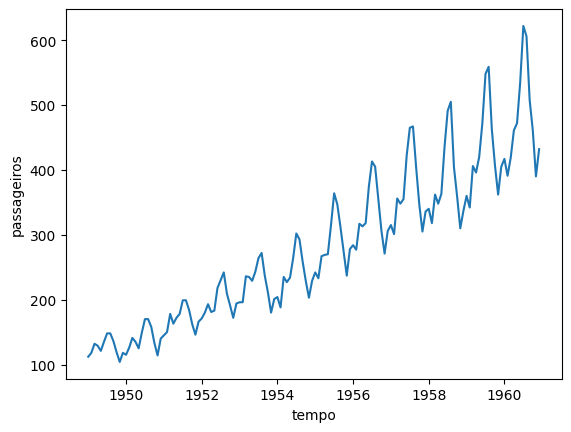

In [3]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros)

In [4]:
sc= StandardScaler()

In [5]:
sc.fit(passageiros)

StandardScaler()

In [6]:
dado_escalato= sc.transform(passageiros)

In [7]:
x=dado_escalato[:,0]
y=dado_escalato[:,1]

<Axes: >

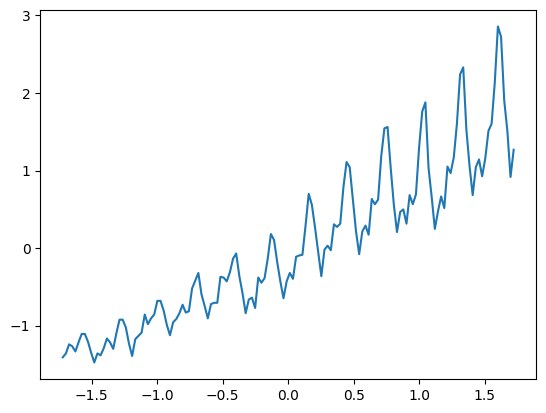

In [8]:
sns.lineplot(x=x,y=y)

In [9]:
tamanho_treino=int(len(passageiros)*0.9)
tamanho_teste=len(passageiros)-tamanho_treino

#90% dos dados serao de treino
#10% dos dados serao de teste

In [10]:
xtreino=x[0:tamanho_treino]
ytreino=y[0:tamanho_treino]

In [11]:
xteste=x[tamanho_treino:len(passageiros)]
yteste=y[tamanho_treino:len(passageiros)]

<Axes: >

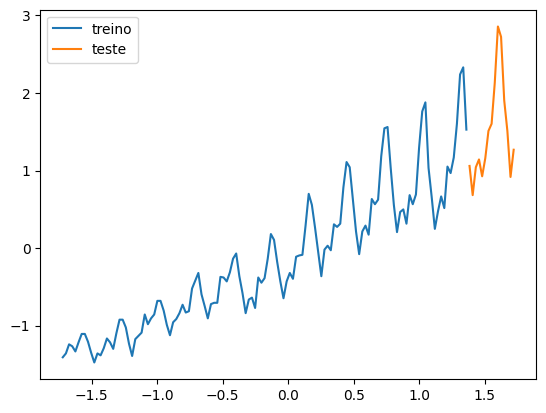

In [12]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
#prever a regiao em laranja

In [13]:
regressor= Sequential()

In [14]:
regressor.add(Dense(1,input_dim=1,kernel_initializer='Ones',activation='linear',use_bias=False))

#dense(1)== a unica entrada(data) esta se ligando a um unico neuronio da camada de saida
#dim= dimensao da entrada
#kernel=inicializando o kernel (os pesos) com numeros 1
#como desejamos transformar a nossa entrada(data) em numeros de pasageiros é necessario multiplicar por um peso
#use_bias= False nao ira somar e sim multiplicar

In [15]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
#mean_squared_error Ela calcula a média dos quadrados das diferenças entre os valores
#previstos e os valores reais. Ela é útil porque penaliza erros maiores mais severamente do que erros menores, o que a torna bastante sensível a outliers.

In [16]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
regressor.fit(xtreino,ytreino)

5/5 [==============================] - 0s 4ms/step - loss: 0.1285


In [18]:
y_predict=regressor.predict(xtreino)

5/5 [==============================] - 0s 2ms/step


<Axes: >

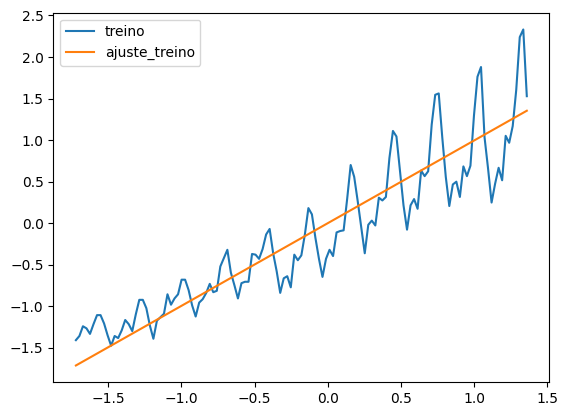

In [19]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

In [20]:
d={'tempo':xtreino,'passageiros':y_predict[:,0]}

In [21]:
resultados=pd.DataFrame(data=d)
resultados

,tempo,passageiros
0,-1.720064,-1.712588
1,-1.696007,-1.688636
2,-1.671950,-1.664684
3,-1.647894,-1.640731
4,-1.623837,-1.616779
...,...,...
124,1.262984,1.257495
125,1.287041,1.281447
126,1.311098,1.305399
127,1.335155,1.329352


In [22]:
resultado_transf=sc.inverse_transform(resultados)

In [23]:
resultado_transf=pd.DataFrame(resultado_transf)

In [24]:
resultado_transf.columns=['tempo','passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

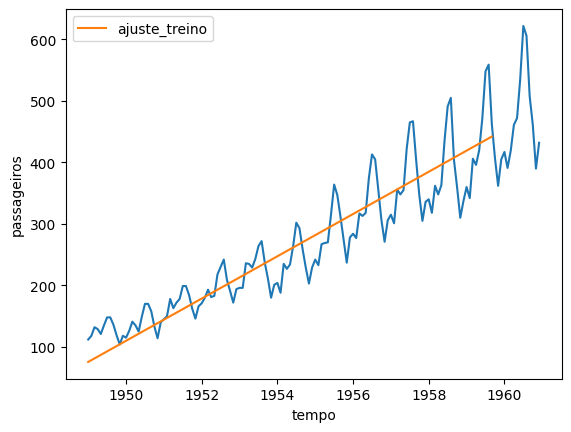

In [25]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros)
sns.lineplot(x='tempo',y='passageiros',data=resultado_transf,label='ajuste_treino')

In [26]:
y_predict_teste=regressor.predict(xteste)

1/1 [==============================] - 0s 27ms/step


In [27]:
d={'tempo':xteste,'passageiros':y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)
resultado_transf_teste=sc.inverse_transform(resultados_teste)
resultado_trans_teste=pd.DataFrame(resultado_transf_teste)
resultado_trans_teste.columns=['tempo','passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

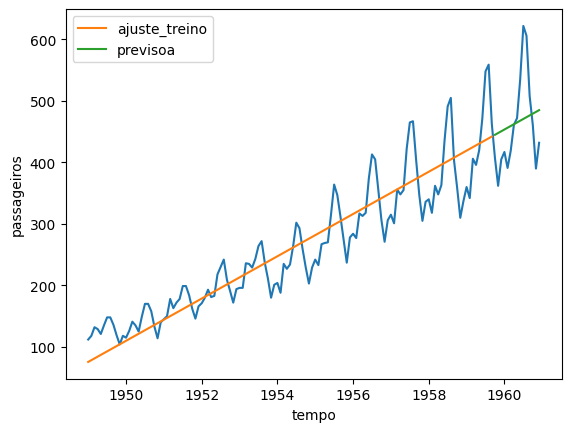

In [28]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros)
sns.lineplot(x='tempo',y='passageiros',data=resultado_transf,label='ajuste_treino')
sns.lineplot(x='tempo',y='passageiros',data=resultado_trans_teste,label='previsoa')

#Adicionando camadas

In [29]:
regressor2=Sequential()

In [30]:
regressor2.add(Dense(8,input_dim=1,kernel_initializer='random_uniform',activation='linear',use_bias=False))
regressor2.add(Dense(8,kernel_initializer='random_uniform',activation='linear',use_bias=False))
regressor2.add(Dense(1,kernel_initializer='random_uniform',activation='linear',use_bias=False))

In [31]:
regressor2.compile(optimizer='adam',loss='mean_squared_error')

In [32]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
regressor2.fit(xtreino,ytreino, epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 3ms/step - loss: 0.8098
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8093
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8088
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8081
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8072
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8058
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8039
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8011
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7976
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7924
Epoch 11/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7855
Epoch 12/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7764
Epoch 13/200
5/5 [==============================] - 0s 3ms/st

In [34]:
y_predict= regressor2.predict(xtreino)

5/5 [==============================] - 0s 3ms/step


In [35]:
y_predict_teste = regressor2.predict(xteste)

1/1 [==============================] - 0s 23ms/step


<Axes: >

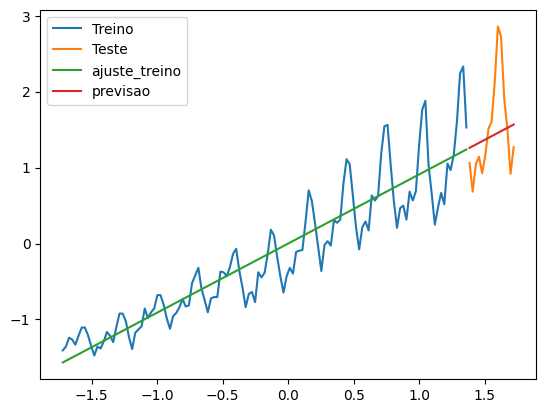

In [36]:
sns.lineplot(x=xtreino,y=ytreino,label='Treino')
sns.lineplot(x=xteste,y=yteste,label='Teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsao')

In [37]:
vetor=pd.DataFrame(ytreino)[0]

In [38]:
def separa_dados(vetor,n_passos):
  X_novo,y_novo = [],[]
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo,y_novo = np.array(X_novo),np.array(y_novo)
  return X_novo,y_novo

In [39]:
xtreino_novo,ytreino_novo = separa_dados(vetor,1)

In [40]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [41]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [42]:
vetor2=pd.DataFrame(yteste)[0]

In [43]:
xteste_novo,yteste_novo = separa_dados(vetor2,1)

#Treinando a rede

In [44]:
regressor3=Sequential()

In [45]:
regressor3.add(Dense(8,input_dim=1,kernel_initializer='ones',activation='linear',use_bias=False))
regressor3.add(Dense(64,kernel_initializer='random_uniform',activation='sigmoid',use_bias=False))
regressor3.add(Dense(1,kernel_initializer='random_uniform',activation='linear',use_bias=False))

In [46]:
regressor3.compile(optimizer='adam',loss='mean_squared_error')

In [47]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 0.7829
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7508
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7286
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.7120
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6895
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6646
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6387
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6099
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5782
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5444
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5088
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4674
Epoch 13/100
4/4 [==============================] - 0s 5ms/

In [59]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 [==============================] - 0s 100ms/step


In [61]:
resultado = pd.DataFrame(y_predict_teste_novo) [0]

<Axes: xlabel='tempo', ylabel='0'>

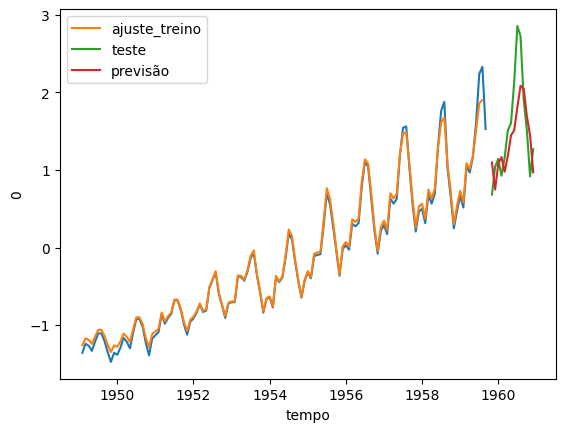

In [64]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129])
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')
sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo', y=resultado.values,data=passageiros[130:144], label='previsão')